# Biased and unbiased point estimators

## Reminder 
**Bias of a point estimator:**

\begin{equation}
    b = E[\hat{\theta}] - \theta_{true}
\end{equation}

- biased estimator: $b \neq 0$
- unbiased estimator: $b = 0$

The normalized bias:

\begin{equation}
    \frac{b}{\theta_{true}} = \frac{E[\hat{\theta}]}{\theta_{true}} - 1
\end{equation}

## Example: Estimator for standard deviation and variance

**References:**
- https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation

### Unknown mean, using sample mean:

**Uncorrected sample standard deviation and variance:**

\begin{equation}
    \rho = \frac{1}{\sqrt{n}}  \sqrt{ \sum_{i=1}^{N} (x_{i} - \bar{x})^{2} }
\end{equation}

\begin{equation}
    \rho^{2} = \frac{1}{n} \sum_{i=1}^{N} (x_{i} - \bar{x})^{2} 
\end{equation}

**Bessel corrected sample standard deviation and variance:**

\begin{equation}
    s =  \frac{1}{\sqrt{n-1}}  \sqrt{ \sum_{i=1}^{N} (x_{i} - \bar{x})^{2} }
\end{equation}


\begin{equation}
    s^{2} =  \frac{1}{n-1} \sum_{i=1}^{N} (x_{i} - \bar{x})^{2} 
\end{equation}


### Known mean


\begin{equation}
    \Sigma^{2} =  \frac{1}{n} \sum_{i=1}^{N} (x_{i} - \mu)^{2} 
\end{equation}

**Bias:**

| $\rho$ |  $s$  | $\rho^{2}$ | $s^{2}$ | $\Sigma^{2}$ |
| ------ | ----- | ---------- | ------- | ---------- |
| biased | biased | biased | unbiased | unbiased |

- $s^{2}$ is an unbiased estimator of $\sigma^{2}$

    \begin{equation}
        b(s^{2}) = E[s^{2}] - \sigma^{2} = 0
    \end{equation}
    
- $\rho^{2}$ is a biased estimator of $\sigma^{2}$:

    \begin{equation}
        b(\rho^{2}) = E[\rho^{2}] - \sigma^{2} \neq 0 
    \end{equation}

**Remark:**

If $x \sim \text{Norm}$ then we also now how $\rho$, $s$ and $\rho^{2}$, $s^{2}$ are distributed:

\begin{equation}
    (n-1) \frac{s^{2}}{\sigma^{2}} \sim \chi^{2}(df=n-1)
\end{equation}

\begin{equation}
    \sqrt{n-1} \frac{s}{\sigma} \sim \chi(df=n-1)
\end{equation}

This is only true for normally distributed $x$, but not for other distributions

$c_{4}(n)$ correction factor, is a multiplicative factor which relates the expected value of the estimator to true values

\begin{equation}
    E[s] = c_{4}(n) \sigma
\end{equation}

\begin{equation}
    \frac{b(s)}{\sigma} = c_{4}(n) - 1
\end{equation}

note that $s_{true} = \sigma$.

$c_{4}(n)$ explicity is:

\begin{equation}
    c_{4}(n)
    =
    \sqrt{\frac{2}{n-1}}
    \frac{\Gamma(\frac{n}{2})}{ \Gamma(\frac{n-1}{2})}
\end{equation}

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [2]:
def show_samples(samples, range=(1.0, 9.0)):
    sample_sizes = [len(sample) for sample in samples[:,0]]
    f,axes = plt.subplots(nrows=len(sample_sizes), figsize=(8,10))
    axes = axes.flatten()
    for a,sample in zip(axes, samples[:,0]):
        a.hist(sample, bins=50, range=range)
    return f,a

In [25]:
def show_stddev_var_estimator_distributions(samples, sigma_truth):
    
    sample_sizes = [len(sample) for sample in samples[:,0]]
    
    stddevs_n   = np.array([ [np.std(sample[i]) for i in range(n_experiments)] for sample in samples])
    stddevs_n_1 = np.array([ [np.std(sample[i], ddof=1) for i in range(n_experiments)] for sample in samples])

    vars_n   = np.array([ [np.var(sample[i]) for i in range(n_experiments)] for sample in samples])
    vars_n_1 = np.array([ [np.var(sample[i], ddof=1) for i in range(n_experiments)] for sample in samples])
    
    stddev_min = stddevs_n_1.min()
    stddev_max = stddevs_n_1.max()
    
    var_min = vars_n_1.min()
    var_max = vars_n_1.max() 
    
    stddev_grid = np.linspace(stddev_min, stddev_max, 100)
    var_grid    = np.linspace(var_min,       var_max, 100)
    
    chi_pdfs  = [stats.chi.pdf(stddev_grid, df=N_obs-1, scale=(sigma_truth/np.sqrt(N_obs-1)) ) for N_obs in sample_sizes]
    chi2_pdfs = [stats.chi2.pdf(var_grid, df=N_obs-1,  scale=(sigma_truth**2/(N_obs-1))) for N_obs in sample_sizes]
    
    f,axes = plt.subplots(nrows=3, ncols=4, figsize=(14,14))
    axes = axes.flatten()

    for i, (stddev_n, stddev_n_1, var_n, var_n_1) in enumerate(zip(stddevs_n, stddevs_n_1, vars_n, vars_n_1)):

        stddev_n_mean   = np.mean(stddev_n)
        stddev_n_1_mean = np.mean(stddev_n_1)

        var_n_mean   = np.mean(var_n)
        var_n_1_mean = np.mean(var_n_1)

        N_obs = sample_sizes[i]
        df = N_obs - 1

        # - Std. deviation 1/(n)
        axes[4*i].hist(stddev_n, bins=50, range=(stddev_min, stddev_max), normed=True)
        axes[4*i].vlines(stddev_n_1_mean, 0.0, 0.3)
        title = r"$\rho$  ($N_{{obs}}={}$)".format(N_obs)
        axes[4*i].set_title(title)
        axes[4*i].text(0.7, 0.7, r"$\rho$ mean:"+"\n{:.2f}".format(stddev_n_mean), transform=axes[4*i].transAxes)


        # - Std. deviation 1/(n-1) 
        axes[4*i+1].hist(stddev_n_1, bins=50, range=(stddev_min, stddev_max), normed=True)
        axes[4*i+1].vlines(stddev_n_1_mean, 0.0, 0.3)
        title = r"$s$  ($N_{{obs}}={}$)".format(N_obs)
        axes[4*i+1].set_title(title)
        label = "Scaled $\chi(df=N_{obs}-1)$ func"
        axes[4*i+1].plot(stddev_grid, chi_pdfs[i], label=label)
        axes[4*i+1].legend()
        axes[4*i+1].text(0.7, 0.7, r"$s$ mean:"+"\n{:.2f}".format(stddev_n_1_mean), transform=axes[4*i+1].transAxes)


        # - 
        axes[4*i+2].hist(var_n, bins=50, range=(var_min, var_max), normed=True)
        axes[4*i+2].vlines(var_n_mean, 0.0, 0.3)
        title = r"$\rho^{{2}}$  ($N_{{obs}}={}$)".format(N_obs)
        axes[4*i+2].set_title(title)
        axes[4*i+2].text(0.7, 0.7, r"$\rho^{{2}}$ mean:"+"\n{:.2f}".format(var_n_mean), transform=axes[4*i+2].transAxes)

        # - 
        axes[4*i+3].hist(var_n_1, bins=50, range=(var_min, var_max), normed=True)
        axes[4*i+3].vlines(var_n_1_mean, 0.0, 0.3)
        title = r"$s^{{2}}$  ($N_{{obs}}={}$)".format(N_obs)
        axes[4*i+3].set_title(title)
        label = "Scaled $\chi^{2}(df=N_{obs}-1)$ func"
        axes[4*i+3].plot(var_grid, chi2_pdfs[i], label=label)
        axes[4*i+3].legend()
        axes[4*i+3].text(0.7, 0.7, r"$s^{{2}}$ mean:"+"\n{:.2f}".format(var_n_1_mean), transform=axes[4*i+3].transAxes)
        
    return f,axes

In [26]:
mean  = 2.0
sigma = 4.0

In [27]:
sample_sizes = [3, 12, 48]

In [28]:
n_experiments = 10000

In [29]:
gaussian_samples = np.array([[stats.norm.rvs(loc=mean, scale=sigma, size=sample_size) for i in range(n_experiments)] for sample_size in sample_sizes ])
expon_samples  = np.array([[stats.expon.rvs(loc=0.0, scale=sigma, size=sample_size) for i in range(n_experiments)] for sample_size in sample_sizes ])

(<matplotlib.figure.Figure at 0x7f74866494a8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f74862debe0>)

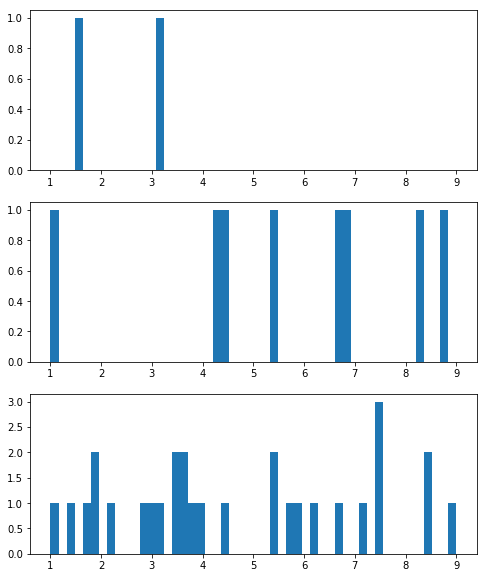

In [30]:
show_samples(gaussian_samples)

(<matplotlib.figure.Figure at 0x7f7486ae3eb8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f7485f6c518>)

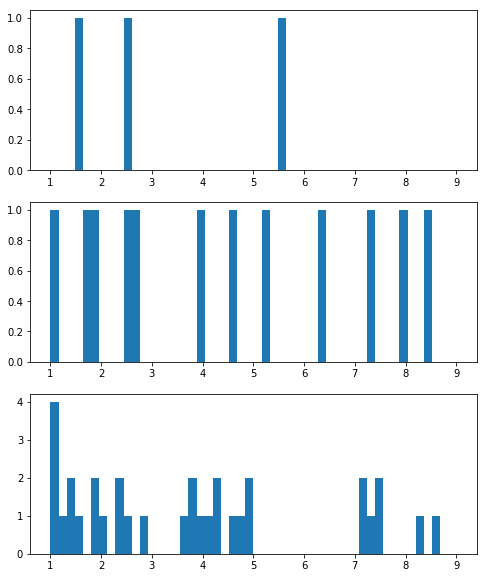

In [31]:
show_samples(expon_samples)

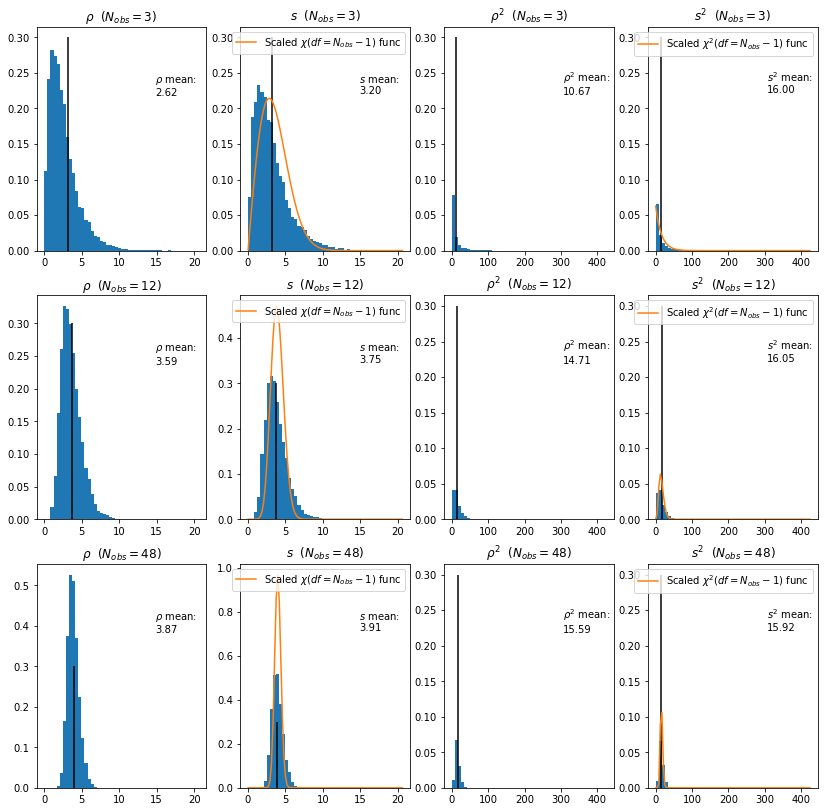

In [32]:
f,a = show_stddev_var_estimator_distributions(expon_samples, sigma)

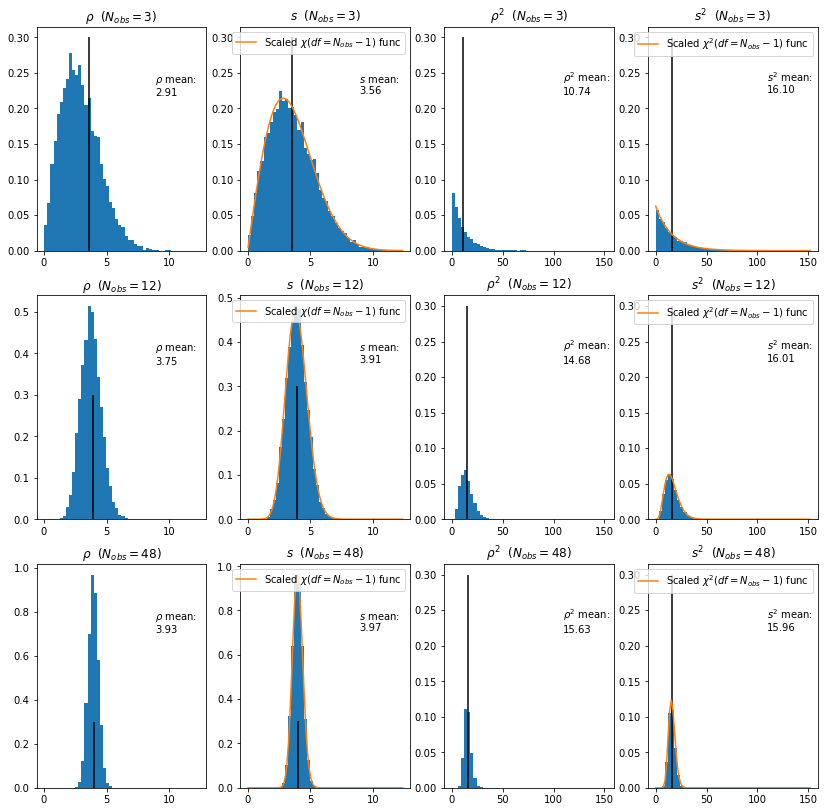

In [33]:
f,a = show_stddev_var_estimator_distributions(gaussian_samples, sigma)